# 데이터 불러오기 및 전처리

In [1]:
# 1. 데이터 불러오기
import pandas as pd
df = pd.read_csv('/content/dataset.csv')

# 2. 'TotalCharges'를 수치로 변환 (에러는 NaN 처리)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. 열별 결측치 개수 확인
missing = df.isnull().sum()
print("각 열의 결측치 수:")
print(missing[missing > 0])  # 결측치가 있는 열만 출력

각 열의 결측치 수:
TotalCharges    11
dtype: int64


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 1. 데이터 전처리

In [4]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv('/content/dataset.csv')

# 2. 각 열의 결측치 수 확인
print("각 열의 결측치 수:")
missing = df.isnull().sum()
print(missing[missing > 0])

# 3. 'TotalCharges'를 수치로 변환 (문자열 → float, 오류 시 NaN 처리)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 다시 결측치 확인 (변환 후 생긴 NaN 포함)
print("\nTotalCharges' 변환 후 결측치 수:")
print(df['TotalCharges'].isnull().sum())

각 열의 결측치 수:
Series([], dtype: int64)

TotalCharges' 변환 후 결측치 수:
11


In [5]:
# 4. 결측치 행 제거 (보통 수가 적을 경우)
df = df.dropna()

# 5. 'customerID'는 식별자이므로 제거
df = df.drop(columns=['customerID'])

# 6. 범주형 변수들을 원-핫 인코딩으로 변환
df = pd.get_dummies(df, drop_first=True)

# 7. 전처리 완료 후 정보 출력
print("\n전처리 완료! 데이터 정보:")
print(df.info())


전처리 완료! 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool 

In [6]:
# 범주형을 다 원핫인코딩 상태로 변경!
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


### 2. 그리디 기반 Feature **Selection**

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 1. y와 X 분리
y = df['Churn_Yes']
X = df.drop(columns=['Churn_Yes'])

# 2. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 세 가지 모델 정의
lr = LogisticRegression(max_iter=1000)
ridge = RidgeClassifier()
lasso = Lasso(alpha=0.1, max_iter=1000)  # Lasso는 회귀 모델이므로 분류용으로는 적합하지 않지만 참고용

# 4. 모델 학습 및 예측
lr.fit(X_scaled, y)
ridge.fit(X_scaled, y)
lasso.fit(X_scaled, y)  # 이건 회귀라 y값 float처럼 처리됨

# 5. 예측값 계산
y_pred_lr = lr.predict(X_scaled)
y_pred_ridge = ridge.predict(X_scaled)
y_pred_lasso = lasso.predict(X_scaled)

# 6. MSE 계산
mse_lr = mean_squared_error(y, y_pred_lr)
mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lasso = mean_squared_error(y, y_pred_lasso)

# 7. 결과 출력
print(f"Logistic Regression MSE: {mse_lr:.4f}")
print(f"Ridge Classifier MSE: {mse_ridge:.4f}")
print(f"Lasso (회귀모델) MSE: {mse_lasso:.4f}")

Logistic Regression MSE: 0.1935
Ridge Classifier MSE: 0.1978
Lasso (회귀모델) MSE: 0.1708


In [8]:
from sklearn.metrics import accuracy_score, f1_score

# 분류 모델만 (Lasso는 제외)
print("Logistic Regression Accuracy:", accuracy_score(y, y_pred_lr))
print("Ridge Classifier Accuracy:", accuracy_score(y, y_pred_ridge))
print("Logistic Regression F1 Score:", f1_score(y, y_pred_lr))
print("Ridge Classifier F1 Score:", f1_score(y, y_pred_ridge))

Logistic Regression Accuracy: 0.8064562002275313
Ridge Classifier Accuracy: 0.8021899886234357
Logistic Regression F1 Score: 0.6028596440035016
Ridge Classifier F1 Score: 0.5816541353383459


로지스틱 회귀로 특성선택 진행

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd

# 1. 스케일러 정의 및 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 정규화된 X

# 2. 모델 정의
model = LogisticRegression(max_iter=1000)

# 3. RFE 적용
selector = RFE(estimator=model, n_features_to_select=1)
selector.fit(X_scaled, y)

# 4. 중요도 순위 출력
ranking = pd.Series(selector.ranking_, index=X.columns).sort_values()
print(ranking.head(30))

tenure                                    1
InternetService_Fiber optic               2
TotalCharges                              3
Contract_Two year                         4
OnlineSecurity_No internet service        5
Contract_One year                         6
MonthlyCharges                            7
StreamingMovies_Yes                       8
StreamingMovies_No internet service       9
StreamingTV_Yes                          10
MultipleLines_Yes                        11
StreamingTV_No internet service          12
PaymentMethod_Electronic check           13
PaperlessBilling_Yes                     14
TechSupport_No internet service          15
DeviceProtection_No internet service     16
OnlineSecurity_Yes                       17
TechSupport_Yes                          18
OnlineBackup_No internet service         19
SeniorCitizen                            20
InternetService_No                       21
Dependents_Yes                           22
PhoneService_Yes                

In [10]:
# top_20_features 변수에 RFE로 선택된 상위 20개 특성 이름을 저장
top_20_features = ranking.head(20).index.tolist()

top_20_features

['tenure',
 'InternetService_Fiber optic',
 'TotalCharges',
 'Contract_Two year',
 'OnlineSecurity_No internet service',
 'Contract_One year',
 'MonthlyCharges',
 'StreamingMovies_Yes',
 'StreamingMovies_No internet service',
 'StreamingTV_Yes',
 'MultipleLines_Yes',
 'StreamingTV_No internet service',
 'PaymentMethod_Electronic check',
 'PaperlessBilling_Yes',
 'TechSupport_No internet service',
 'DeviceProtection_No internet service',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'OnlineBackup_No internet service',
 'SeniorCitizen']

In [11]:
# 원본 df에서 상위 20개 특성만 뽑기
df_top20 = df[top_20_features].copy()

# 이제 df_top20의 컬럼명은 이미 정확하므로 변경 불필요
# 필요하면 아래처럼 컬럼명 다시 지정 가능
df_top20.columns = top_20_features

print(df_top20.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7032 non-null   int64  
 1   InternetService_Fiber optic           7032 non-null   bool   
 2   TotalCharges                          7032 non-null   float64
 3   Contract_Two year                     7032 non-null   bool   
 4   OnlineSecurity_No internet service    7032 non-null   bool   
 5   Contract_One year                     7032 non-null   bool   
 6   MonthlyCharges                        7032 non-null   float64
 7   StreamingMovies_Yes                   7032 non-null   bool   
 8   StreamingMovies_No internet service   7032 non-null   bool   
 9   StreamingTV_Yes                       7032 non-null   bool   
 10  MultipleLines_Yes                     7032 non-null   bool   
 11  StreamingTV_No interne

In [12]:
df_top20

,tenure,InternetService_Fiber optic,TotalCharges,Contract_Two year,OnlineSecurity_No internet service,Contract_One year,MonthlyCharges,StreamingMovies_Yes,StreamingMovies_No internet service,StreamingTV_Yes,MultipleLines_Yes,StreamingTV_No internet service,PaymentMethod_Electronic check,PaperlessBilling_Yes,TechSupport_No internet service,DeviceProtection_No internet service,OnlineSecurity_Yes,TechSupport_Yes,OnlineBackup_No internet service,SeniorCitizen
0,1,False,29.85,False,False,False,29.85,False,False,False,False,False,True,True,False,False,False,False,False,0
1,34,False,1889.50,False,False,True,56.95,False,False,False,False,False,False,False,False,False,True,False,False,0
2,2,False,108.15,False,False,False,53.85,False,False,False,False,False,False,True,False,False,True,False,False,0
3,45,False,1840.75,False,False,True,42.30,False,False,False,False,False,False,False,False,False,True,True,False,0
4,2,True,151.65,False,False,False,70.70,False,False,False,False,False,True,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,False,1990.50,False,False,True,84.80,True,False,True,True,False,False,True,False,False,True,True,False,0
7039,72,True,7362.90,False,False,True,103.20,True,False,True,True,False,False,True,False,False,False,False,False,0
7040,11,False,346.45,False,False,False,29.60,False,False,False,False,False,True,True,False,False,True,False,False,0
7041,4,True,306.60,False,False,False,74.40,False,False,False,True,False,False,True,False,False,False,False,False,1


### 3. PCA

In [13]:
from sklearn.model_selection import train_test_split

X, y = df_top20.iloc[:, 1:].values, df_top20.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[ 8.38048052e+00+0.00000000e+00j  2.27737747e+00+0.00000000e+00j
  1.71387181e+00+0.00000000e+00j  1.22998599e+00+0.00000000e+00j
  2.70092967e-02+0.00000000e+00j  1.91686644e-01+0.00000000e+00j
  8.96848377e-01+0.00000000e+00j  8.17436260e-01+0.00000000e+00j
  7.85826001e-01+0.00000000e+00j  6.80320820e-01+0.00000000e+00j
  6.10885081e-01+0.00000000e+00j  5.20663755e-01+0.00000000e+00j
  4.54478569e-01+0.00000000e+00j  4.16990406e-01+0.00000000e+00j
 -3.73202058e-18+5.63058938e-17j -3.73202058e-18-5.63058938e-17j
 -5.05724074e-17+0.00000000e+00j  2.29593327e-17+0.00000000e+00j
  4.57443386e-27+0.00000000e+00j]

Eigenvectors 
[[-2.05300614e-01+0.00000000e+00j  1.00246260e-01+0.00000000e+00j
  -4.21250008e-01+0.00000000e+00j  7.78122785e-03+0.00000000e+00j
   4.29701989e-01+0.00000000e+00j  2.26284882e-01+0.00000000e+00j
   1.49916124e-02+0.00000000e+00j  2.61639069e-01+0.00000000e+00j
  -3.27080921e-02+0.00000000e+00j  1.53361769e-01+0.00000000e+00j
   1.64388599e-01+0.00

In [16]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/transforms.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


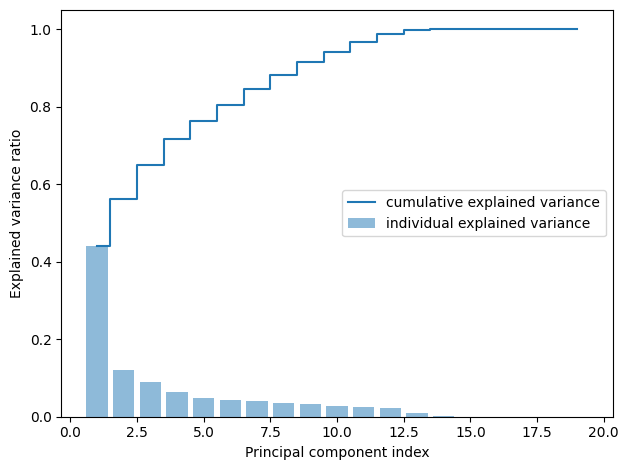

In [17]:
import matplotlib.pyplot as plt

n_components = len(var_exp)  # 19 또는 var_exp 길이

plt.bar(range(1, n_components + 1), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, n_components + 1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- 주성분을 순서대로 더했을 때 누적되는 설명 분산의 비율을 꺾은선 그래프로
- 그래프를 통해 몇 개의 주성분을 선택해야 데이터의 분산을 충분히 설명할 수 있는지 판단
- 그래프가 가파르게 상승하다가 완만해지는 지점을 통해 적절한 주성분의 개수를 결정

결론: 12개의 주성분을 선택하는 것이 데이터의 주요 정보 유지하며 차원을 효율적으로 축소할 수 있다!

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [19]:
eigen_pairs

[(np.float64(8.380480518048769),
  array([-0.20530061+0.j, -0.19063446+0.j,  0.0545109 +0.j,  0.33104101+0.j,
         -0.00178017+0.j, -0.31166876+0.j, -0.19715125+0.j,  0.33104101+0.j,
         -0.19519354+0.j, -0.12154208+0.j,  0.33104101+0.j, -0.10815286+0.j,
         -0.13855631+0.j,  0.33104101+0.j,  0.33104101+0.j, -0.12882441+0.j,
         -0.13643036+0.j,  0.33104101+0.j, -0.07761288+0.j])),
 (np.float64(2.277377468119432),
  array([ 0.10024626+0.j, -0.44989047+0.j, -0.47162207+0.j, -0.10986358+0.j,
         -0.09014522+0.j, -0.10633086+0.j, -0.23827517+0.j, -0.10986358+0.j,
         -0.23819178+0.j, -0.21307708+0.j, -0.10986358+0.j,  0.30401527+0.j,
          0.10511745+0.j, -0.10986358+0.j, -0.10986358+0.j, -0.28611512+0.j,
         -0.3379426 +0.j, -0.10986358+0.j,  0.1217176 +0.j])),
 (np.float64(1.7138718143145064),
  array([-0.42125001+0.j, -0.1589034 +0.j,  0.03027152+0.j, -0.15948833+0.j,
          0.03450372+0.j, -0.22423188+0.j, -0.18867323+0.j, -0.15948833+0.j,
    

In [20]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.20530061+0.j  0.10024626+0.j]
 [-0.19063446+0.j -0.44989047+0.j]
 [ 0.0545109 +0.j -0.47162207+0.j]
 [ 0.33104101+0.j -0.10986358+0.j]
 [-0.00178017+0.j -0.09014522+0.j]
 [-0.31166876+0.j -0.10633086+0.j]
 [-0.19715125+0.j -0.23827517+0.j]
 [ 0.33104101+0.j -0.10986358+0.j]
 [-0.19519354+0.j -0.23819178+0.j]
 [-0.12154208+0.j -0.21307708+0.j]
 [ 0.33104101+0.j -0.10986358+0.j]
 [-0.10815286+0.j  0.30401527+0.j]
 [-0.13855631+0.j  0.10511745+0.j]
 [ 0.33104101+0.j -0.10986358+0.j]
 [ 0.33104101+0.j -0.10986358+0.j]
 [-0.12882441+0.j -0.28611512+0.j]
 [-0.13643036+0.j -0.3379426 +0.j]
 [ 0.33104101+0.j -0.10986358+0.j]
 [-0.07761288+0.j  0.1217176 +0.j]]


In [21]:
eigen_pairs[0][1][:, np.newaxis]

array([[-0.20530061+0.j],
       [-0.19063446+0.j],
       [ 0.0545109 +0.j],
       [ 0.33104101+0.j],
       [-0.00178017+0.j],
       [-0.31166876+0.j],
       [-0.19715125+0.j],
       [ 0.33104101+0.j],
       [-0.19519354+0.j],
       [-0.12154208+0.j],
       [ 0.33104101+0.j],
       [-0.10815286+0.j],
       [-0.13855631+0.j],
       [ 0.33104101+0.j],
       [ 0.33104101+0.j],
       [-0.12882441+0.j],
       [-0.13643036+0.j],
       [ 0.33104101+0.j],
       [-0.07761288+0.j]])

In [22]:
eigen_pairs[1][1][:, np.newaxis]

array([[ 0.10024626+0.j],
       [-0.44989047+0.j],
       [-0.47162207+0.j],
       [-0.10986358+0.j],
       [-0.09014522+0.j],
       [-0.10633086+0.j],
       [-0.23827517+0.j],
       [-0.10986358+0.j],
       [-0.23819178+0.j],
       [-0.21307708+0.j],
       [-0.10986358+0.j],
       [ 0.30401527+0.j],
       [ 0.10511745+0.j],
       [-0.10986358+0.j],
       [-0.10986358+0.j],
       [-0.28611512+0.j],
       [-0.3379426 +0.j],
       [-0.10986358+0.j],
       [ 0.1217176 +0.j]])

In [23]:
from sklearn.decomposition import PCA

# PCA 객체 생성 및 주성분 개수 지정 (12개)
# random_state를 설정하여 결과를 재현 가능하게 만듭니다.
pca = PCA(n_components=12, random_state=0)

# 훈련 데이터셋에 PCA 적용 (fit_transform)
X_train_pca_12 = pca.fit_transform(X_train_std)

# 테스트 데이터셋에 PCA 적용 (transform)
# 테스트 데이터는 훈련 데이터에 fit된 PCA 객체를 사용하여 transform만 수행합니다.
X_test_pca_12 = pca.transform(X_test_std)

# 변환된 데이터의 형태 확인 (original features: 19 -> PCA components: 12)
print("Original training data shape:", X_train_std.shape)
print("PCA transformed training data shape:", X_train_pca_12.shape)
print("Original test data shape:", X_test_std.shape)
print("PCA transformed test data shape:", X_test_pca_12.shape)

Original training data shape: (4922, 19)
PCA transformed training data shape: (4922, 12)
Original test data shape: (2110, 19)
PCA transformed test data shape: (2110, 12)


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


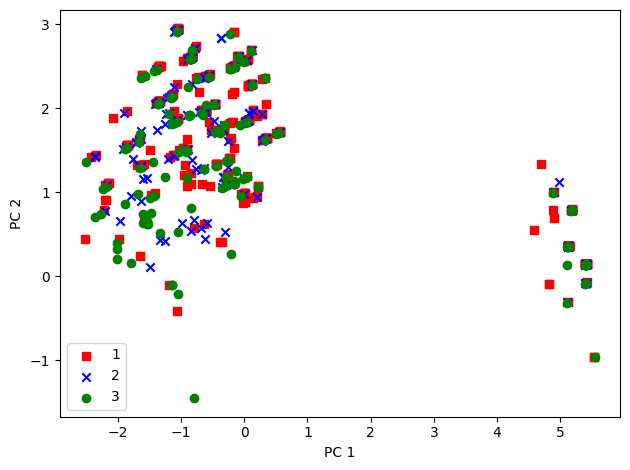

In [24]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X, y = df_top20.iloc[:, 1:].values, df_top20.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Simple Ensemble

In [89]:
# 1. x, y 정의
X = df_top20.values
y = df['Churn_Yes'].values

# 2. Train/Test 분할 (70% 훈련, 30% 테스트) – stratify=y 로 클래스 비율 유지
# 데이터 샘플이 많기 때문에 기존 80%->70%로 변경
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0,
    stratify=y)

# 3. +정규화
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

In [90]:
X.shape

(7032, 20)

In [91]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [97]:
# 가장 가까운 이웃 한개만 / 편향이 낮고 분산이 큰 모델
# 정규화 강도를 크게 / 편향이 크고 분산이 작은 모델
# 깊이가 1로 / 편향이 크고 분산이 작은 모델
# 앙상블을 통해 편향과 분산 동시에 줄이기 가능

models = [
    ('knn', KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')),
    ('lr', LogisticRegression(penalty='l2', C=0.001, random_state=1,max_iter=10000)),
    ('dt',DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0))
]

In [104]:
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
# 예측값, 정답
print('knn accr:', accuracy_score(knn.predict(X_test), y_test))

knn accr: 0.7341232227488151


In [105]:
knn.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [106]:
lr = LogisticRegression(penalty='l2', C=0.001, random_state=1,max_iter=10000)
lr.fit(X_train_std, y_train)
# 예측값, 정답
print('lr accr:',accuracy_score(lr.predict(X_test), y_test))

lr accr: 0.7341232227488151


In [107]:
dt = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
dt.fit(X_train, y_train)
# 예측값, 정답
print('dt accr:',accuracy_score(dt.predict(X_test), y_test))

dt accr: 0.7341232227488151


In [108]:
dt.predict_proba(X_test)

array([[0.96779809, 0.03220191],
       [0.66313279, 0.33686721],
       [0.96779809, 0.03220191],
       ...,
       [0.96779809, 0.03220191],
       [0.96779809, 0.03220191],
       [0.66313279, 0.33686721]])

In [118]:
hard_vote  = VotingClassifier(models, voting='hard')
hard_vote.fit(X_train_std, y_train)
print('hard vote accr:',accuracy_score(hard_vote.predict(X_test_std), y_test))

hard vote accr: 0.7805687203791469


In [122]:
soft_vote  = VotingClassifier(models, voting='soft')
soft_vote.fit(X_train_std, y_train)
print('soft vote accr:',accuracy_score(soft_vote.predict(X_test_std), y_test))

soft vote accr: 0.747867298578199


In [154]:
# 정확도 판별 추가 코드
print("[Hard Voting Classification Report]")
print(classification_report(y_test, hard_vote.predict(X_test_std), target_names=['Not Churn','Churn']))
print("[Soft Voting Classification Report]")
print(classification_report(y_test, soft_vote.predict(X_test_std), target_names=['Not Churn','Churn']))


[Hard Voting Classification Report]
              precision    recall  f1-score   support

   Not Churn       0.78      0.97      0.87      1549
       Churn       0.78      0.24      0.37       561

    accuracy                           0.78      2110
   macro avg       0.78      0.61      0.62      2110
weighted avg       0.78      0.78      0.74      2110

[Soft Voting Classification Report]
              precision    recall  f1-score   support

   Not Churn       0.82      0.85      0.83      1549
       Churn       0.53      0.47      0.50       561

    accuracy                           0.75      2110
   macro avg       0.67      0.66      0.67      2110
weighted avg       0.74      0.75      0.74      2110



# 2. Bagging

In [130]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. 베이스 분류기로 깊이 3짜리 결정 트리 지정
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

# 2. BaggingClassifier로 500개 트리 학습 & 투표, 전체 피처 사용, 복원 추출...
bag = BaggingClassifier(
    estimator=tree,
    n_estimators=500,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=1)

In [138]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train_std, y_train) #개별 트리 학습
y_train_pred = tree.predict(X_train_std) #훈련 데이터셋에 대한 예측값
y_test_pred = tree.predict(X_test_std) # 테스트셋에 대한 예측값

tree_train = accuracy_score(y_train, y_train_pred) #(정답,예측값)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train_std, y_train)
y_train_pred = bag.predict(X_train_std)
y_test_pred = bag.predict(X_test_std)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 0.761/0.764
Bagging train/test accuracies 0.790/0.794


In [140]:
# 정확도 판별 추가 코드
print("[Bagging Classification Report]")
print(classification_report(y_test, y_test_pred, target_names=['Not Churn','Churn']))

[Bagging Classification Report]
              precision    recall  f1-score   support

   Not Churn       0.82      0.93      0.87      1549
       Churn       0.68      0.43      0.53       561

    accuracy                           0.79      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110



# 3. Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 앞이랑 동일
forest = RandomForestClassifier(
    criterion='entropy',
    n_estimators=500,
    max_depth=3,
    max_features='log2',
    random_state=1,
    n_jobs=-1
)
forest.fit(X_train_std, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=500, n_jobs=-1, random_state=1)

In [151]:
rf_train = accuracy_score(y_train, forest.predict(X_train_std))
rf_test = accuracy_score(y_test, forest.predict(X_test_std))
print('Randomforest train/test accuracies %.3f/%.3f'
      % (rf_train, rf_test))

Randomforest train/test accuracies 0.784/0.782


In [156]:
# 정확도 판별 추가 코드
print("[Random Forest Classification Report]")
print(classification_report(y_test, forest.predict(X_test_std), target_names=['Not Churn','Churn']))

[Random Forest Classification Report]
              precision    recall  f1-score   support

   Not Churn       0.79      0.96      0.87      1549
       Churn       0.71      0.30      0.42       561

    accuracy                           0.78      2110
   macro avg       0.75      0.63      0.65      2110
weighted avg       0.77      0.78      0.75      2110



# 4. AdaBoost

In [158]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


# 1. 결정 트리 약하게 학습
stump_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

# 2. AdaBoost 약하게 학습
ada = AdaBoostClassifier(
    estimator=stump_tree,
    n_estimators=1000,
    learning_rate=0.1,
    random_state=1)

ada.fit(X_train_std, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=1000, random_state=1)

In [161]:
tree = tree.fit(X_train_std, y_train)
y_train_pred = tree.predict(X_train_std)
y_test_pred = tree.predict(X_test_std)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train_std, y_train)
y_train_pred = ada.predict(X_train_std)
y_test_pred = ada.predict(X_test_std)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.761/0.764
AdaBoost train/test accuracies 0.797/0.797


In [162]:
# 정확도 판별 추가 코드
print("\n[AdaBoost Classification Report]")
print(classification_report(y_test, y_test_pred, target_names=['Not Churn','Churn']))



[AdaBoost Classification Report]
              precision    recall  f1-score   support

   Not Churn       0.82      0.93      0.87      1549
       Churn       0.69      0.43      0.53       561

    accuracy                           0.80      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110



# 5. 시각화 비교 / (1차 앙상블)

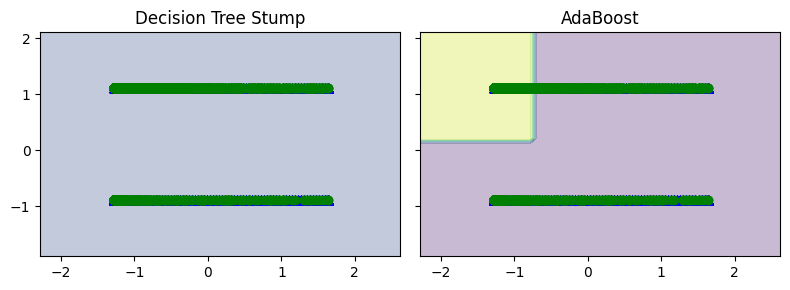

In [181]:
import matplotlib.pyplot as plt

# 1) 두 개의 피처만 선택
X2_train = X_train_std[:, [0, 1]]
y2_train = y_train


# 2) 그리드 범위 설정 (첫 번째, 두 번째 피처의 min/max 기준)
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))


# 3) 서브플롯 생성
f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(8,3))

for idx, (clf, title) in enumerate(zip([stump_clf, ada2_clf], ['Decision Tree Stump', 'AdaBoost'])):

    # 그리드 예측
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # 등고선 채우기
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)

    # 학습 데이터 산점도
    axarr[idx].scatter(
        X2_train[y2_train == 0, 0], X2_train[y2_train == 0, 1],
        c='blue', marker='^', label='Not Churn')
    axarr[idx].scatter(
        X2_train[y2_train == 1, 0], X2_train[y2_train == 1, 1],
        c='green', marker='o', label='Churn')
    axarr[idx].set_title(title)



plt.tight_layout()
plt.show()


왼쪽 (Stump):
=tenure가 임계값보다 작으면 모든 고객을 Not Churn(또는 Churn)으로 예측 → 그 바깥 영역을 모두 반대 클래스로 예측

오른쪽 (AdaBoost):
Stump를 여러 번 학습하면서 fiber optic 여부로 틀렸던 샘플 보정 → tenure, fiber optic 여부를 동시에 고려

→ AdaBoost가 Stump보다 훨씬 더 유연하게(=비선형적으로) 데이터를 나눔

In [190]:
from sklearn.metrics import confusion_matrix

# AdaBoost Confusion Matrix
y_pred_ada = ada_clf.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred_ada)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix (AdaBoost)\n", cm)
print(f"TN: {tn}")
print(f"FP: {fp}")
print(f"FN: {fn}")
print(f"TP: {tp}")


Confusion Matrix (AdaBoost)
 [[1438  111]
 [ 318  243]]
TN: 1438
FP: 111
FN: 318
TP: 243


In [191]:
# 앞에서 했음
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ada, target_names=['Not Churn','Churn']))

              precision    recall  f1-score   support

   Not Churn       0.82      0.93      0.87      1549
       Churn       0.69      0.43      0.53       561

    accuracy                           0.80      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110



AdaBoost ROC‐AUC: 0.847


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


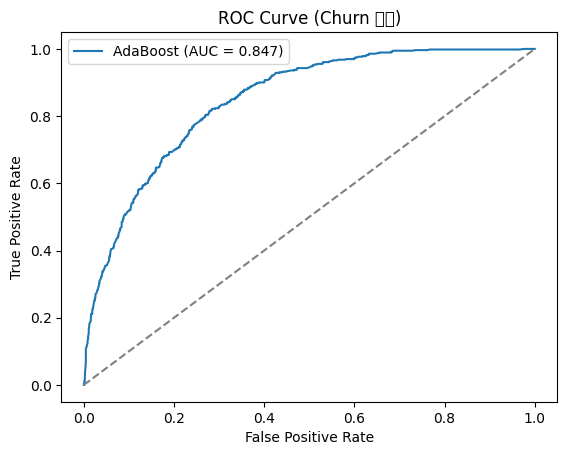

In [194]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba_ada = ada_clf.predict_proba(X_test_std)[:, 1]

# ROC‐AUC 계산
auc = roc_auc_score(y_test, y_proba_ada)
fpr, tpr, _ = roc_curve(y_test, y_proba_ada)

print(f"AdaBoost ROC‐AUC: {auc:.3f}")

plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Churn 예측)")
plt.legend()
plt.show()

장점:
Baseline 대비 Accuracy +6%p 이상 개선
ROC-AUC 0.847로 성능 좋음
- 모델이 의미 있는 패턴을 잡아내고 있음

단점:
Churn Recall이 0.43... → 561명 중 318명을 놓쳤음 (FN)
- 놓친 고객을 찾아서 마케팅을 실시할 기회 X


만약 이탈 고객 1명을 잡는 수익이 크다면, Recall을 더 올려야하고 중요하게 봐야함

개선 방법:
1. threshold 를 0.5보다 내려서 더 많은 샘플을 churn으로 예측하게 해서, FN을 줄이고 FP를 늘려야함
(놓친 사람은 줄어들고, 잔류했는데 이탈하는 걸로 아는 사례는 늘어남)

2. LightGBM, XGBoost 추가

3. 앙상블끼리 스태킹(Stacking)

# 1. threshold 를 0.5보다 내려서 더 많은 샘플을 churn으로 예측하게 해서, FN을 줄이고 FP를 늘려야함

In [197]:
# Cell 1: Threshold 조정 (AdaBoost 예시)
#  - AdaBoost에서 predict_proba를 사용해 예측 확률을 구하고,
#    예제 Threshold(0.5) 대신 0.4로 조정하여 Churn Recall을 높여 본다.

from sklearn.metrics import precision_recall_curve, classification_report, accuracy_score

# (1-1) 기존 AdaBoost 모델이 ada_clf에 학습된 상태라 가정
#        만약 아직 학습되지 않았다면 아래 코드로 먼저 학습:
# ada_clf.fit(X_train_std, y_train)

# (1-2) 테스트셋에 대한 예측 확률
y_proba_ada = ada_clf.predict_proba(X_test_std)[:, 1]  # Churn 확률

# (1-3) precision-recall 곡선을 계산하여 적절한 Threshold 후보 보기
precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_proba_ada)

# (1-4) recall이 0.60 이상 나오는 첫 번째 Threshold 확인
for p, r, t in zip(precision_vals, recall_vals, thresholds):
    if r >= 0.60:
        print(f"Threshold {t:.2f} → Precision {p:.3f}, Recall {r:.3f}")
        break

# 예시: Threshold=0.32 일 때 Recall 약 0.60 이상일 수 있음 (출력되는 값 사용)
best_thr = t

# (1-5) 새 Threshold로 예측 레이블 생성
y_pred_ada_thr = (y_proba_ada >= best_thr).astype(int)

# (1-6) 조정된 Threshold 결과 평가
print("\n[Threshold 조정 (AdaBoost)]")
print(f"사용 Threshold: {best_thr:.2f}")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_ada_thr)))
print(classification_report(y_test, y_pred_ada_thr, target_names=['Not Churn','Churn']))


Threshold 0.17 → Precision 0.266, Recall 1.000

[Threshold 조정 (AdaBoost)]
사용 Threshold: 0.17
Accuracy: 0.266
              precision    recall  f1-score   support

   Not Churn       0.00      0.00      0.00      1549
       Churn       0.27      1.00      0.42       561

    accuracy                           0.27      2110
   macro avg       0.13      0.50      0.21      2110
weighted avg       0.07      0.27      0.11      2110



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 2. LightGBM, XGBoost 추가

In [200]:
import lightgbm as lgb

n_pos = sum(y_train == 1)
n_neg = sum(y_train == 0)
scale_pos = n_neg / n_pos

lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    learning_rate=0.1,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1,
    class_weight={0:1, 1:scale_pos}
)
lgb_clf.fit(X_train_std, y_train)
y_pred_lgb = lgb_clf.predict(X_test_std)

print("=== LightGBM ===")
print("Train Accuracy: {:.3f}".format(accuracy_score(y_train, lgb_clf.predict(X_train_std))))
print("Test  Accuracy: {:.3f}".format(accuracy_score(y_test,  y_pred_lgb)))
print(classification_report(y_test, y_pred_lgb, target_names=['Not Churn','Churn']))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1308, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 4922, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [202]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1,
    eval_metric='logloss',
    scale_pos_weight=scale_pos   # 이탈이 소수인 비율 보정
)
xgb_clf.fit(X_train_std, y_train)
y_pred_xgb = xgb_clf.predict(X_test_std)

print("=== XGBoost ===")
print("Train Accuracy: {:.3f}".format(accuracy_score(y_train, xgb_clf.predict(X_train_std))))
print("Test  Accuracy: {:.3f}".format(accuracy_score(y_test,  y_pred_xgb)))
print(classification_report(y_test, y_pred_xgb, target_names=['Not Churn','Churn']))

=== XGBoost ===
Train Accuracy: 0.818
Test  Accuracy: 0.758
              precision    recall  f1-score   support

   Not Churn       0.88      0.77      0.82      1549
       Churn       0.53      0.72      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110



# 시각화 비교 / (2차 앙상블)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


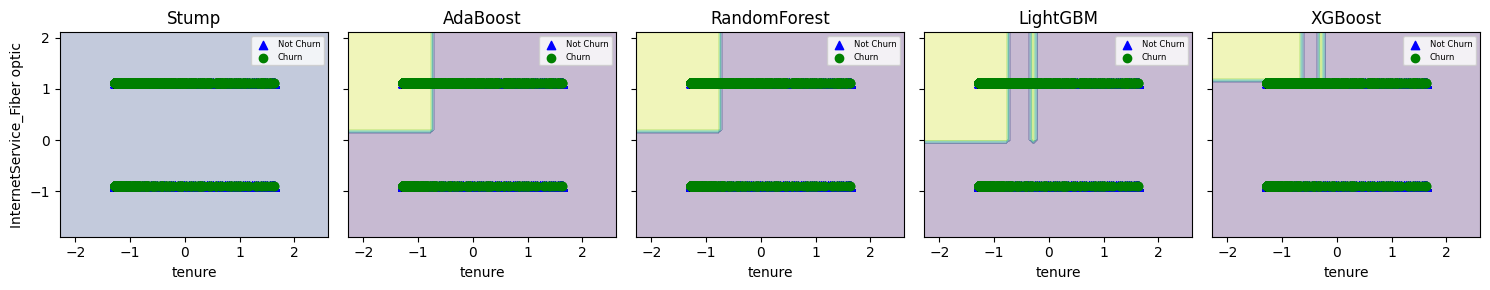

In [209]:
#방식은 위 1차 앙상블의 시각화와 동일

X2_train = X_train_std[:, [0, 1]]
y2_train = y_train



# 1) 결정 경계 시각화용 그리드 생성
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.1))

# 2) 1행 5열 서브플롯 생성: Stump / AdaBoost / RandomForest / LightGBM / XGBoost
fig, axarr = plt.subplots(1, 5, sharex='col', sharey='row', figsize=(15, 3))

models = [
    (stump2_clf, 'Stump'),
    (ada2_clf,   'AdaBoost'),
    (rf2_clf,    'RandomForest'),
    (lgb2_clf,   'LightGBM'),
    (xgb2_clf,   'XGBoost')]

for idx, (clf, title) in enumerate(models):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(
        X2_train[y2_train == 0, 0], X2_train[y2_train == 0, 1],
        c='blue', marker='^', label='Not Churn')
    axarr[idx].scatter(
        X2_train[y2_train == 1, 0], X2_train[y2_train == 1, 1],
        c='green', marker='o', label='Churn')
    axarr[idx].set_title(title)
    if idx == 0:
        axarr[idx].set_ylabel(df_top20.columns[1], fontsize=10)
    axarr[idx].set_xlabel(df_top20.columns[0], fontsize=10)
    axarr[idx].legend(loc='upper right', fontsize=6)

plt.tight_layout()
plt.show()


# 3. 앙상블끼리 스태킹(Stacking)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


=== Voting Ensemble (Soft Voting) ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Train Accuracy: 0.811
Test  Accuracy: 0.764
              precision    recall  f1-score   support

   Not Churn       0.88      0.78      0.83      1549
       Churn       0.54      0.72      0.62       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


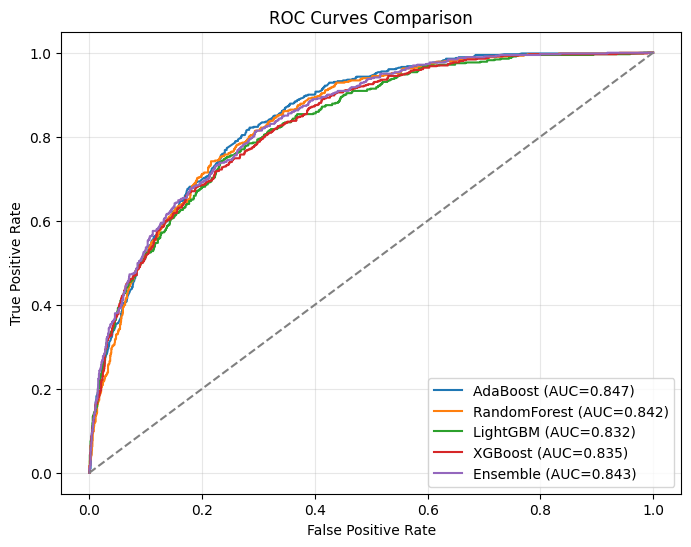

In [212]:
from sklearn.ensemble import StackingClassifier

# soft Voting방식으로 stacking

voting_clf = VotingClassifier(
    estimators=[
        ('ada', ada_simple),
        ('rf',  rf_w_clf),
        ('lgb', lgb_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft',
    n_jobs=-1
)
voting_clf.fit(X_train_std, y_train)

# Voting 예측 및 평가
y_pred_vot = voting_clf.predict(X_test_std)

print("=== Voting Ensemble (Soft Voting) ===")
print("Train Accuracy: {:.3f}".format(accuracy_score(y_train, voting_clf.predict(X_train_std))))
print("Test  Accuracy: {:.3f}".format(accuracy_score(y_test,  y_pred_vot)))
print(classification_report(y_test, y_pred_vot, target_names=['Not Churn','Churn']))


# ROC-AUC 비교를 위해 예측 확률 수집
y_proba_ada  = ada_simple.predict_proba(X_test_std)[:, 1]
y_proba_rf   = rf_w_clf.predict_proba(X_test_std)[:, 1]
y_proba_lgb  = lgb_clf.predict_proba(X_test_std)[:, 1]
y_proba_xgb  = xgb_clf.predict_proba(X_test_std)[:, 1]
y_proba_vot  = voting_clf.predict_proba(X_test_std)[:, 1]


# ROC-AUC 계산
auc_ada = roc_auc_score(y_test, y_proba_ada)
auc_rf  = roc_auc_score(y_test, y_proba_rf)
auc_lgb = roc_auc_score(y_test, y_proba_lgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
auc_vot = roc_auc_score(y_test, y_proba_vot)


# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(*roc_curve(y_test, y_proba_ada)[:2], label=f"AdaBoost (AUC={auc_ada:.3f})")
plt.plot(*roc_curve(y_test, y_proba_rf)[:2],  label=f"RandomForest (AUC={auc_rf:.3f})")
plt.plot(*roc_curve(y_test, y_proba_lgb)[:2], label=f"LightGBM (AUC={auc_lgb:.3f})")
plt.plot(*roc_curve(y_test, y_proba_xgb)[:2], label=f"XGBoost (AUC={auc_xgb:.3f})")
plt.plot(*roc_curve(y_test, y_proba_vot)[:2], label=f"Ensemble (AUC={auc_vot:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

결론: 모델을 업그레이드하면서 정확도는 좀 떨어졌지만, recall이 0.43에서 0.72로 상승함.
→ 놓치는 고객이 현저히 줄어들음

정확도는 0.78쯤에서 0.764로 조금밖에 안 줄어들었으니까... recall 훨씬 늘어난게 더 크다고 봄
더군다나 churn 평가는 이탈 고객 잡는게 더 중요하다고 생각하기 때문에 업그레이드를 잘 한듯


F1-score 관점에서는
0.53에서 0.62로 개선했기 때문에,
Churn/Not-Churn을 더 균형있게 잡아낼 수 있음

 **진짜 결론:
Churn를 잡아내는 성능(Recall, F1)이 많이 좋아졌고, 전체 Accuracy는 소폭 낮아진 대신, 비즈니스 관점에서 더 중요한 지표(이탈 저격율)를 대폭 개선 시킴**